# kNN implementation in  python 


We first import two useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. use tab and shift+tab for help

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line plots graphs in line
%matplotlib inline

### First we generate a dataset

In [3]:
# randomly
# C_g is the array for centroids
# 
M_g = 3
np.random.seed(3)
C_g = np.random.rand(M_g,2)*.6+0.2
print C_g

[[ 0.53047874  0.62488869]
 [ 0.37454284  0.50649656]
 [ 0.73576817  0.73777585]]


In [4]:
# we can also fix the centroids on a diagonal
C_g=np.array([[.25,.25],
             [.5,.5],
             [.75,.75]])

In [5]:
# we can also choose the centroids arbitarily
C_g=np.array([[.25,.25],
             [.75,.5],
             [.45,.75]])

In [6]:
# Generate data set ( M=3, centroid, constant sigma)
#
sigma=0.15
number=50
#
# storing the centroid index 
X11=np.concatenate((sigma*np.random.randn(number,2)+C_g[0],np.full((number,1),0.0)),axis=1)
X22=np.concatenate((sigma*np.random.randn(number,2)+C_g[1],np.full((number,1),1.0)),axis=1)
X33=np.concatenate((sigma*np.random.randn(number,2)+C_g[2],np.full((number,1),2.0)),axis=1)
#
#X=np.concatenate((X1,X2,X3), axis=0)
X=np.concatenate((X11,X22,X33), axis=0)
np.random.shuffle(X)
print X

[[ 0.47292225  0.28550744  0.        ]
 [ 0.90584282  0.59476163  1.        ]
 [ 0.22682397  0.5154441   0.        ]
 [ 0.70792148  0.39611779  2.        ]
 [ 0.38102308  1.04861067  2.        ]
 [ 0.58567927  0.47015232  2.        ]
 [ 0.38114286  0.05596951  0.        ]
 [ 0.34647449  0.28736301  0.        ]
 [ 0.25750505  0.18929839  0.        ]
 [ 0.1114312   0.09641864  0.        ]
 [ 0.67041268  0.390421    1.        ]
 [ 0.20496909  0.5737224   0.        ]
 [ 0.39735512  0.08483986  0.        ]
 [ 0.54248668  0.62435528  2.        ]
 [ 0.34211156  0.12431316  0.        ]
 [ 0.16050255  0.16171084  0.        ]
 [ 0.65273837  0.38938027  1.        ]
 [-0.18736066  0.10422392  0.        ]
 [ 0.36429766  0.78986806  2.        ]
 [ 0.75036662  0.56369536  1.        ]
 [ 0.56686471  0.50894231  1.        ]
 [ 0.35254239  0.99470744  2.        ]
 [ 0.81686714  0.38259364  1.        ]
 [ 0.07224302  0.21915252  0.        ]
 [ 0.728907    0.64956326  1.        ]
 [ 0.66172476  0.26801663

#### You can improve the above code snippet to generate any arbitrary number (M) of  clusters

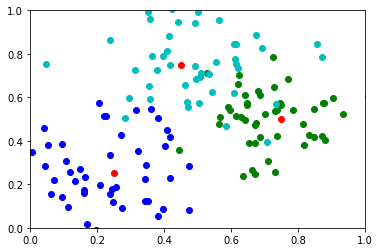

In [7]:

plt.figure()
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X[:,0])):
    plt.plot(X[i,0],X[i,1],col[int(X[i,2])])
plt.plot(C_g[:,0],C_g[:,1],'ro')
plt.axis([0, 1.0, 0, 1.0])
plt.show()

In [8]:
#split data set into train and test
split = int((number*M_g)*0.7)
print "Split point = ",split
X_train=np.asarray(X[0:split,:])
print "Train size = ",len(X_train[:,0])
X_test=np.asarray(X[split:,:])
print "Test size =",len(X_test[:,0])

Split point =  105
Train size =  105
Test size = 45


## kNN starts here

In [9]:
# find distance from each example in x_train
# rank using distance
# pick up top k entries
# select by majority (use histogram)
x_new_index=0
x_new=np.full((len(X_train),3),[X_test[x_new_index,0],X_test[x_new_index,1],-1.0])
#print x_new
x_diff=X_train-x_new
#print x_diff
x_new[:,2]=np.sqrt(x_diff[:,0]**2.0+x_diff[:,1]**2.0)
#print x_new
x_rank=np.concatenate((np.copy(X_train),x_new),axis=1)
#print x_rank
r_index=x_rank[:,5].argsort()
#print r_index
print X_test[x_new_index,:]
print x_rank[r_index,:][0:10,:]

[ 0.35186074  0.12168442  0.        ]
[[ 0.34211156  0.12431316  0.          0.35186074  0.12168442  0.01009736]
 [ 0.39735512  0.08483986  0.          0.35186074  0.12168442  0.05854281]
 [ 0.38114286  0.05596951  0.          0.35186074  0.12168442  0.07194368]
 [ 0.27294186  0.09037071  0.          0.35186074  0.12168442  0.08490429]
 [ 0.34378674  0.225923    0.          0.35186074  0.12168442  0.1045508 ]
 [ 0.24638433  0.11670139  0.          0.35186074  0.12168442  0.10559405]
 [ 0.25750505  0.18929839  0.          0.35186074  0.12168442  0.11608034]
 [ 0.23758878  0.1559499   0.          0.35186074  0.12168442  0.1192988 ]
 [ 0.24342727  0.1784173   0.          0.35186074  0.12168442  0.12237825]
 [ 0.47313147  0.0822549   0.          0.35186074  0.12168442  0.12751971]]


In [10]:
# take majority from k nearest neighbours, if tie pick one at random
k=5
aa=x_rank[r_index,:][0:k,2]
print(aa)
hh,bb=np.histogram(aa, [0,1,2,3])
print(hh)
rr=hh.argsort()
print rr[-1], "is the predicted class"


[ 0.  0.  0.  0.  0.]
[5 0 0]
0 is the predicted class


In [15]:

def predict_knn(X_test, X_train, k):
    predicted=np.zeros(len(X_test[:,0]))
    for x_new_index in range(0, len(X_test[:,0])):
    #for x_new_index in range(3,4,1):
        x_new=np.full((len(X_train),3),[X_test[x_new_index,0],X_test[x_new_index,1],-1.0])
        #print x_new
        x_diff=X_train-x_new
        #print x_diff
        x_new[:,2]=np.sqrt(x_diff[:,0]**2.0+x_diff[:,1]**2.0)
        #print x_new
        x_rank=np.concatenate((np.copy(X_train),x_new),axis=1)
        #print x_rank
        r_index=x_rank[:,5].argsort()
        #print r_index
        #print X_test[x_new_index,:]
        #print x_rank[r_index,:][0:10,:]
        aa=x_rank[r_index,:][0:k,2]
        #print(aa)
        hh,bb=np.histogram(aa, [0,1,2,3])
        #print(hh)
        rr=hh.argsort()
        #print rr[-1], "is the predicted class"
        predicted[x_new_index] = rr[-1]

    return predicted


In [16]:
# loop over all test cases
# calculate overall accuracy
# calculate accuracy per class

maxK=0
maxAcc=0
for k in (range(1,len(X_train[:,0]))):
    predicted=predict_knn(X_test, X_train, k)
        
    acc = sum(X_test[:,2]==predicted)/.45
    
    if (acc > maxAcc):
        maxAcc = acc
        maxK = k
        
    print "k=",k, "->",(sum(X_test[:,2]==predicted)/.45)
    
print("Maximum accuracy at k=", maxK, "(",maxAcc,")")
print(predicted)


k= 1 -> 88.8888888889
k= 2 -> 88.8888888889
k= 3 -> 95.5555555556
k= 4 -> 93.3333333333
k= 5 -> 95.5555555556
k= 6 -> 93.3333333333
k= 7 -> 91.1111111111
k= 8 -> 91.1111111111
k= 9 -> 93.3333333333
k= 10 -> 95.5555555556
k= 11 -> 95.5555555556
k= 12 -> 95.5555555556
k= 13 -> 95.5555555556
k= 14 -> 93.3333333333
k= 15 -> 93.3333333333
k= 16 -> 91.1111111111
k= 17 -> 93.3333333333
k= 18 -> 93.3333333333
k= 19 -> 93.3333333333
k= 20 -> 93.3333333333
k= 21 -> 93.3333333333
k= 22 -> 93.3333333333
k= 23 -> 91.1111111111
k= 24 -> 91.1111111111
k= 25 -> 93.3333333333
k= 26 -> 91.1111111111
k= 27 -> 91.1111111111
k= 28 -> 91.1111111111
k= 29 -> 91.1111111111
k= 30 -> 91.1111111111
k= 31 -> 91.1111111111
k= 32 -> 91.1111111111
k= 33 -> 93.3333333333
k= 34 -> 91.1111111111
k= 35 -> 91.1111111111
k= 36 -> 91.1111111111
k= 37 -> 91.1111111111
k= 38 -> 91.1111111111
k= 39 -> 91.1111111111
k= 40 -> 91.1111111111
k= 41 -> 91.1111111111
k= 42 -> 91.1111111111
k= 43 -> 91.1111111111
k= 44 -> 91.11111111

In [18]:
predicted = predict_knn(X_test, X_train, maxK)

print(predicted)

[ 0.  2.  2.  2.  0.  1.  0.  1.  2.  0.  1.  1.  2.  2.  1.  0.  1.  1.
  1.  0.  0.  1.  1.  1.  1.  2.  1.  2.  0.  1.  0.  2.  2.  0.  0.  1.
  0.  2.  0.  2.  2.  0.  0.  0.  0.]


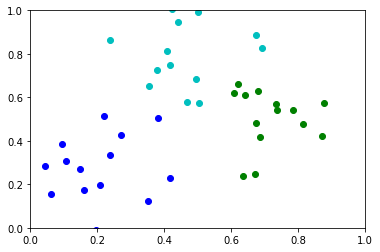

In [19]:

plt.figure()
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X_test[:,0])):
    plt.plot(X_test[i,0],X_test[i,1],col[int(predicted[i])])

plt.axis([0, 1.0, 0, 1.0])
plt.show()